In [1]:
import pandas as pd

In [2]:
countries_aggregated = pd.read_csv('data/countries-aggregated.csv')

In [3]:
countries_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28952 entries, 0 to 28951
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       28952 non-null  object
 1   Country    28952 non-null  object
 2   Confirmed  28952 non-null  int64 
 3   Recovered  28952 non-null  int64 
 4   Deaths     28952 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
countries_aggregated.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
type(countries_aggregated['Date'])

pandas.core.series.Series

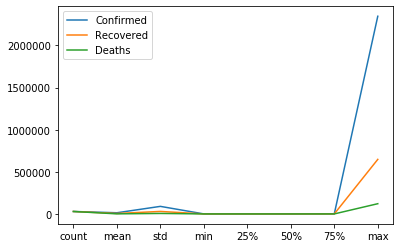

In [7]:
countries_aggregated.describe().plot()

In [8]:
countries_aggregated.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [10]:
len(countries_aggregated['Country'].unique())

188

In [15]:
import matplotlib.pyplot as plt


In [19]:
countries_aggregated['Date'] = pd.to_datetime(countries_aggregated['Date'])

Text(0, 0.5, 'Deaths')

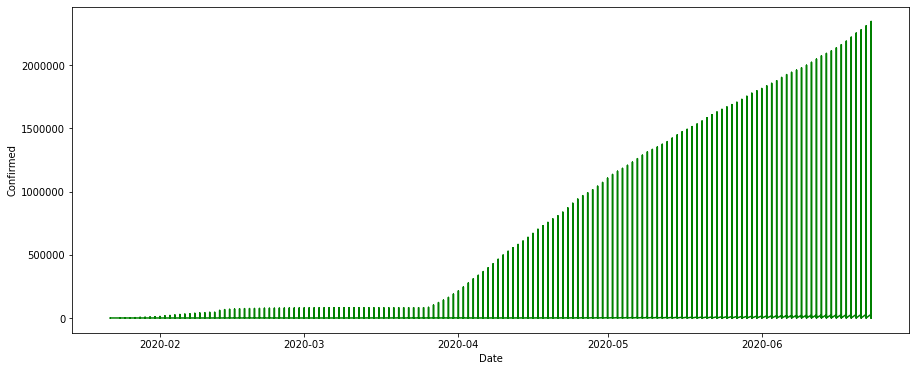

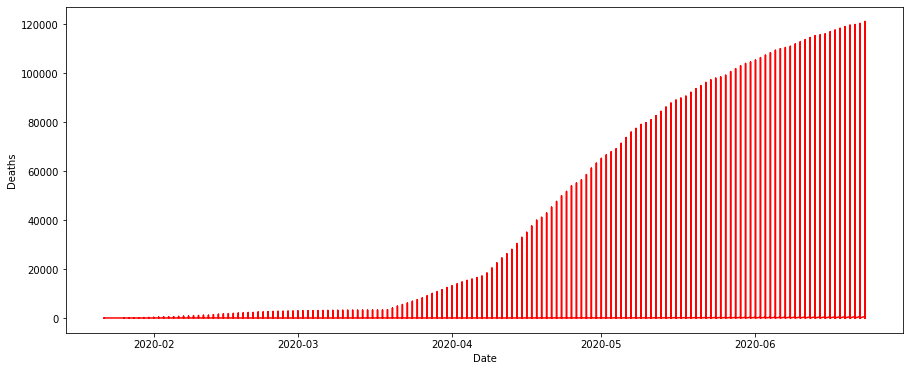

In [26]:
plt.figure(figsize=(15,6))
plt.plot(countries_aggregated['Date'],countries_aggregated['Confirmed'], c = 'g')
plt.xlabel('Date')
plt.ylabel('Confirmed')

plt.figure(figsize=(15,6))
plt.plot(countries_aggregated['Date'],countries_aggregated['Deaths'], c= 'r')
plt.xlabel('Date')
plt.ylabel('Deaths')

In [38]:
key_countries_pivoted = pd.read_csv('data/key-countries-pivoted.csv')

In [39]:
key_countries_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            154 non-null    object
 1   China           154 non-null    int64 
 2   US              154 non-null    int64 
 3   United_Kingdom  154 non-null    int64 
 4   Italy           154 non-null    int64 
 5   France          154 non-null    int64 
 6   Germany         154 non-null    int64 
 7   Spain           154 non-null    int64 
 8   Iran            154 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 11.0+ KB


In [40]:
key_countries_pivoted.head()

,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,643,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,0,2,0,0,0
3,2020-01-25,1406,2,0,0,3,0,0,0
4,2020-01-26,2075,5,0,0,3,0,0,0


In [41]:
key_countries_pivoted.shape

(154, 9)

In [42]:
key_countries_pivoted['Date'] = pd.to_datetime(key_countries_pivoted['Date']) 

In [47]:
type(key_countries_pivoted['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
reference = pd.read_csv('data/reference.csv')

In [49]:
reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             4021 non-null   int64  
 1   iso2            4018 non-null   object 
 2   iso3            4019 non-null   object 
 3   code3           4019 non-null   float64
 4   FIPS            3302 non-null   float64
 5   Admin2          3261 non-null   object 
 6   Province_State  3833 non-null   object 
 7   Country_Region  4021 non-null   object 
 8   Lat             3886 non-null   float64
 9   Long_           3886 non-null   float64
 10  Combined_Key    4021 non-null   object 
 11  Population      3884 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 377.1+ KB


In [50]:
reference.isna().sum()

UID                 0
iso2                3
iso3                2
code3               2
FIPS              719
Admin2            760
Province_State    188
Country_Region      0
Lat               135
Long_             135
Combined_Key        0
Population        137
dtype: int64

In [51]:
reference.shape

(4021, 12)

In [52]:
reference.dropna(inplace= True)

In [53]:
reference.isna().sum()

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Population        0
dtype: int64

In [54]:
reference.shape

(3142, 12)

In [55]:
reference.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
879,84001001,US,USA,840.0,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869.0
880,84001003,US,USA,840.0,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234.0
881,84001005,US,USA,840.0,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686.0
882,84001007,US,USA,840.0,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394.0
883,84001009,US,USA,840.0,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826.0


In [56]:
reference.Country_Region.unique()

array(['US'], dtype=object)

In [57]:
reference.Population.sum()

334947634.0

In [58]:
reference_usa = reference.copy()

In [59]:
combined_time_series = pd.read_csv('data/time-series-19-covid-combined.csv')

In [60]:
combined_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41118 entries, 0 to 41117
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            41118 non-null  object 
 1   Country/Region  41118 non-null  object 
 2   Province/State  12628 non-null  object 
 3   Lat             41118 non-null  float64
 4   Long            41118 non-null  float64
 5   Confirmed       40964 non-null  float64
 6   Recovered       38962 non-null  float64
 7   Deaths          40964 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.5+ MB


In [61]:
combined_time_series.isna().sum()

Date                  0
Country/Region        0
Province/State    28490
Lat                   0
Long                  0
Confirmed           154
Recovered          2156
Deaths              154
dtype: int64

In [67]:
combined_time_series.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [69]:
len(combined_time_series['Country/Region'].unique())

188

In [80]:
us_confirmed = pd.read_csv('data/us_confirmed.csv')

In [71]:
us_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502194 entries, 0 to 502193
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             502194 non-null  int64  
 1   iso2            502194 non-null  object 
 2   iso3            502194 non-null  object 
 3   code3           502194 non-null  int64  
 4   FIPS            500654 non-null  float64
 5   Admin2          501116 non-null  object 
 6   Lat             502194 non-null  float64
 7   Combined_Key    502194 non-null  object 
 8   Date            502194 non-null  object 
 9   Case            502194 non-null  int64  
 10  Long            502194 non-null  float64
 11  Country/Region  502194 non-null  object 
 12  Province/State  502194 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 49.8+ MB


In [72]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa


In [74]:
 col = us_confirmed.columns

In [75]:
col

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Combined_Key',
       'Date', 'Case', 'Long', 'Country/Region', 'Province/State'],
      dtype='object')

In [76]:
col[:4]

Index(['UID', 'iso2', 'iso3', 'code3'], dtype='object')

In [83]:
us_confirmed.drop(columns= col[:6], inplace = True)

In [84]:
us_confirmed.head()

,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa
1,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa
2,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa
3,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa
4,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa


In [87]:
us_confirmed.drop(columns= col[7], inplace= True)

In [91]:
col = us_confirmed.columns

In [92]:
col

Index(['Lat', 'Date', 'Case', 'Long', 'Country/Region', 'Province/State'], dtype='object')

In [96]:
us_confirmed.columns = ['Lat', 'Date', 'Case', 'Long', 'Country/Region', 'Province/State']

In [97]:
us_confirmed.head()

,Lat,Date,Case,Long,Country/Region,Province/State
0,-14.271,2020-01-22,0,-170.132,US,American Samoa
1,-14.271,2020-01-23,0,-170.132,US,American Samoa
2,-14.271,2020-01-24,0,-170.132,US,American Samoa
3,-14.271,2020-01-25,0,-170.132,US,American Samoa
4,-14.271,2020-01-26,0,-170.132,US,American Samoa


In [98]:
reference_usa.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
879,84001001,US,USA,840.0,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869.0
880,84001003,US,USA,840.0,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234.0
881,84001005,US,USA,840.0,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686.0
882,84001007,US,USA,840.0,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394.0
883,84001009,US,USA,840.0,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826.0


In [99]:
cols = reference_usa.columns

In [100]:
cols

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'],
      dtype='object')

In [102]:
reference_usa.drop(columns= cols[:7], inplace = True)

In [103]:
reference_usa.head()

,Country_Region,Lat,Long_,Combined_Key,Population
879,US,32.539527,-86.644082,"Autauga, Alabama, US",55869.0
880,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234.0
881,US,31.868263,-85.387129,"Barbour, Alabama, US",24686.0
882,US,32.996421,-87.125115,"Bibb, Alabama, US",22394.0
883,US,33.982109,-86.567906,"Blount, Alabama, US",57826.0


In [104]:
us_deaths = pd.read_csv('data/us_deaths.csv')

In [106]:
us_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502194 entries, 0 to 502193
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             502194 non-null  int64  
 1   iso2            502194 non-null  object 
 2   iso3            502194 non-null  object 
 3   code3           502194 non-null  int64  
 4   FIPS            500654 non-null  float64
 5   Admin2          501116 non-null  object 
 6   Lat             502194 non-null  float64
 7   Combined_Key    502194 non-null  object 
 8   Population      502194 non-null  int64  
 9   Date            502194 non-null  object 
 10  Case            502194 non-null  int64  
 11  Long            502194 non-null  float64
 12  Country/Region  502194 non-null  object 
 13  Province/State  502194 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 53.6+ MB


In [107]:
cols = us_deaths.columns

In [108]:
cols

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Combined_Key',
       'Population', 'Date', 'Case', 'Long', 'Country/Region',
       'Province/State'],
      dtype='object')

In [109]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-26,0,-170.132,US,American Samoa


In [111]:
us_deaths.drop(columns= cols[:6], inplace= True)

In [112]:
us_deaths.drop(columns= cols[7], inplace = True)

In [113]:
us_deaths.head()

,Lat,Population,Date,Case,Long,Country/Region,Province/State
0,-14.271,55641,2020-01-22,0,-170.132,US,American Samoa
1,-14.271,55641,2020-01-23,0,-170.132,US,American Samoa
2,-14.271,55641,2020-01-24,0,-170.132,US,American Samoa
3,-14.271,55641,2020-01-25,0,-170.132,US,American Samoa
4,-14.271,55641,2020-01-26,0,-170.132,US,American Samoa


In [114]:
worldwide_aggregated = pd.read_csv('data/worldwide-aggregated.csv')

In [115]:
worldwide_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           154 non-null    object 
 1   Confirmed      154 non-null    int64  
 2   Recovered      154 non-null    int64  
 3   Deaths         154 non-null    int64  
 4   Increase rate  153 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.1+ KB


In [116]:
worldwide_aggregated.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [119]:
worldwide_aggregated['Increase rate'] = worldwide_aggregated['Increase rate'].fillna(0)

In [120]:
worldwide_aggregated.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,0.000000
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [121]:
import seaborn as sns

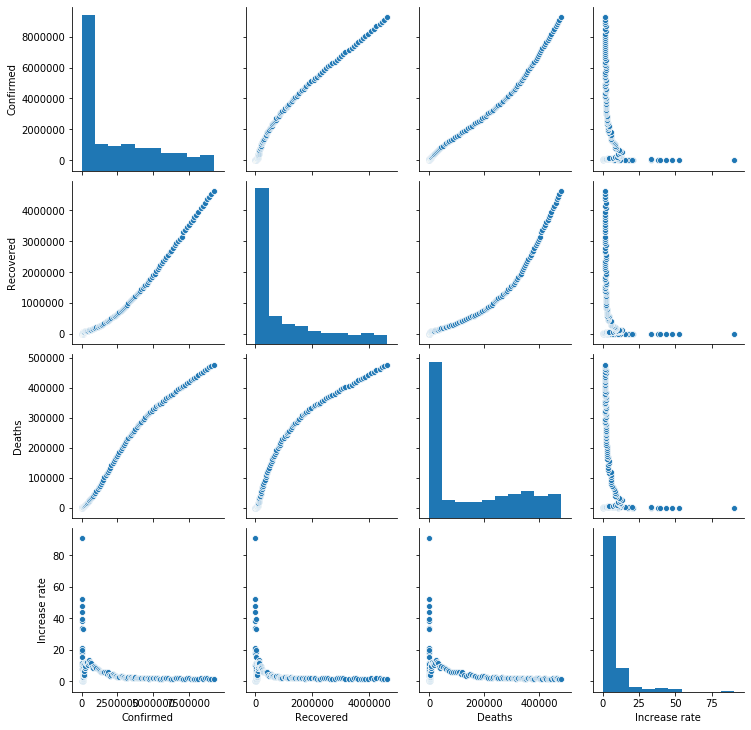

In [123]:
sns.pairplot(worldwide_aggregated)

In [125]:
worldwide_aggregated.to_csv('processed_data/confirmed_death_recovered_worldwide.csv')
us_deaths.to_csv('processed_data/us_death.csv')
us_confirmed.to_csv('processed_data/us_confirmed.csv')
combined_time_series.to_csv('processed_data/combined.csv')
countries_aggregated.to_csv('processed_data/confirmed_death_recovered_country.csv')
reference_usa.to_csv('processed_data/reference_usa.csv')
key_countries_pivoted.to_csv('processed_data/key_country.csv')

In [1]:
import pandas as pd

In [3]:
cases = pd.read_csv('processed_data/confirmed_death_recovered_worldwide.csv')

In [4]:
cases.head()

,Unnamed: 0,Date,Confirmed,Recovered,Deaths,Increase rate
0,0,2020-01-22,555,28,17,0.000000
1,1,2020-01-23,654,30,18,17.837838
2,2,2020-01-24,941,36,26,43.883792
3,3,2020-01-25,1434,39,42,52.391073
4,4,2020-01-26,2118,52,56,47.698745


In [5]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     154 non-null    int64  
 1   Date           154 non-null    object 
 2   Confirmed      154 non-null    int64  
 3   Recovered      154 non-null    int64  
 4   Deaths         154 non-null    int64  
 5   Increase rate  154 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 7.3+ KB


In [6]:
cases.drop(columns= 'Unnamed: 0', inplace = True)

In [7]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,0.000000
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [19]:
recovered_rates = []
for r in cases['Recovered']:
    for c in cases['Confirmed']:
        recovered_rate = (r / c)*100
        recovered_rates.append(recovered_rate)

In [20]:
recovered_rates = pd.Series(recovered_rates)

In [22]:
cases['Recovered_rate'] = recovered_rates

In [23]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Recovered_rate
0,2020-01-22,555,28,17,0.000000,5.045045
1,2020-01-23,654,30,18,17.837838,4.281346
2,2020-01-24,941,36,26,43.883792,2.975558
3,2020-01-25,1434,39,42,52.391073,1.952580
4,2020-01-26,2118,52,56,47.698745,1.322002


In [25]:
death_rates = []
for d in cases['Deaths']:
    for c in cases['Confirmed']:
        death_rate = (d / c)*100
        death_rates.append(death_rate)

In [29]:
death_rates = pd.Series(death_rates)

In [30]:
cases['Death_rates'] = death_rates

In [31]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Recovered_rate,Death_rates
0,2020-01-22,555,28,17,0.000000,5.045045,3.063063
1,2020-01-23,654,30,18,17.837838,4.281346,2.599388
2,2020-01-24,941,36,26,43.883792,2.975558,1.806589
3,2020-01-25,1434,39,42,52.391073,1.952580,1.185495
4,2020-01-26,2118,52,56,47.698745,1.322002,0.802644


In [49]:
recovered_variance = cases['Recovered_rate'].var()

In [50]:
recovered_variance

0.37393361377646994

In [51]:
death_variance = cases['Death_rates'].var()
death_variance

0.13784032446607114

In [37]:
cases.describe()

,Confirmed,Recovered,Deaths,Increase rate,Recovered_rate,Death_rates
count,1.540000e+02,1.540000e+02,154.000000,154.000000,154.000000,154.000000
mean,2.569559e+06,1.019863e+06,156676.772727,6.977458,0.133656,0.081148
std,2.818250e+06,1.312188e+06,164705.828542,11.165294,0.611501,0.371269
min,5.550000e+02,2.800000e+01,17.000000,0.000000,0.000302,0.000184
25%,8.655650e+04,4.051550e+04,2954.750000,1.926149,0.000606,0.000368
50%,1.439514e+06,3.139950e+05,90111.000000,2.831027,0.001947,0.001182
75%,4.618432e+06,1.674539e+06,311112.000000,8.080109,0.032353,0.019643
max,9.263466e+06,4.630391e+06,477584.000000,90.570550,5.045045,3.063063


In [52]:
cases.to_csv('processed_data/calculation.csv')

In [69]:
555+641+941

2137

In [70]:
94/2137

0.04398689751988769

In [71]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Recovered_rate,Death_rates
0,2020-01-22,555,28,17,0.000000,5.045045,3.063063
1,2020-01-23,654,30,18,17.837838,4.281346,2.599388
2,2020-01-24,941,36,26,43.883792,2.975558,1.806589
3,2020-01-25,1434,39,42,52.391073,1.952580,1.185495
4,2020-01-26,2118,52,56,47.698745,1.322002,0.802644


In [76]:
cases['Recovered'].loc[2]

36

In [77]:
cases.shape

(154, 7)

In [121]:
i = 1
recovered_rates_row = []
while i < 154:
    confirmed = sum(cases['Confirmed'].iloc[:i+1])
    recovered = sum(cases['Recovered'].iloc[:i+1])
    rates = recovered / confirmed
    rates *= 100
    recovered_rates_row.append(rates)
    i+=1

In [122]:
recovered_rates_row[-1]

39.69020390356877

In [123]:
len(recovered_rates_row)

153

In [124]:
recovered_rates_row = pd.Series(recovered_rates_row)

In [125]:
recovered_rates_row = recovered_rates_row.shift()

In [126]:
recovered_rates_row.fillna(0, inplace = True)

In [127]:
recovered_rates_row

0       0.000000
1       4.797353
2       4.372093
3       3.710938
4       3.244476
         ...    
148    38.431243
149    38.686553
150    38.944511
151    39.194970
152    39.443418
Length: 153, dtype: float64

In [128]:
recovered_rates_row[153] = 39.69020390356877

In [129]:
len(recovered_rates_row)

154

In [134]:
recovered_rates_row.iloc[-1]

39.69020390356877

In [135]:
cases['actual_recovered_rate'] = recovered_rates_row

In [136]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Recovered_rate,Death_rates,actual_recovered_rate
0,2020-01-22,555,28,17,0.000000,5.045045,3.063063,0.000000
1,2020-01-23,654,30,18,17.837838,4.281346,2.599388,4.797353
2,2020-01-24,941,36,26,43.883792,2.975558,1.806589,4.372093
3,2020-01-25,1434,39,42,52.391073,1.952580,1.185495,3.710938
4,2020-01-26,2118,52,56,47.698745,1.322002,0.802644,3.244476


In [156]:
i = 1
death_rates_row = []
while i < 154:
    confirmed = sum(cases['Confirmed'].iloc[:i+1])
    death = sum(cases['Deaths'].iloc[:i+1])
    rates = death / confirmed
    rates *= 100
    death_rates_row.append(rates)
    i+=1

In [157]:
death_rates_row = pd.Series(death_rates_row)

In [158]:
death_rates_row

0      2.894955
1      2.837209
2      2.873884
3      2.788495
4      2.792908
         ...   
148    6.186816
149    6.164635
150    6.142432
151    6.119995
152    6.097418
Length: 153, dtype: float64

In [159]:
death_rates_row = death_rates_row.shift()

In [160]:
death_rates_row

0           NaN
1      2.894955
2      2.837209
3      2.873884
4      2.788495
         ...   
148    6.208518
149    6.186816
150    6.164635
151    6.142432
152    6.119995
Length: 153, dtype: float64

In [164]:
death_rates_row[153] = 6.097418

In [166]:
death_rates_row

0           NaN
1      2.894955
2      2.837209
3      2.873884
4      2.788495
         ...   
149    6.186816
150    6.164635
151    6.142432
152    6.119995
153    6.097418
Length: 154, dtype: float64

In [167]:
death_rates_row.fillna(0, inplace = True)

In [168]:
cases['actual_death_rates'] = death_rates_row

In [149]:
cases.drop(columns= ['Death_rates', 'Recovered_rate'], inplace= True)

In [170]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,actual_recovered_rate,actual_death_rates
0,2020-01-22,555,28,17,0.000000,0.000000,0.000000
1,2020-01-23,654,30,18,17.837838,4.797353,2.894955
2,2020-01-24,941,36,26,43.883792,4.372093,2.837209
3,2020-01-25,1434,39,42,52.391073,3.710938,2.873884
4,2020-01-26,2118,52,56,47.698745,3.244476,2.788495


In [184]:
non_treatment = cases['actual_recovered_rate'] + cases['actual_death_rates']

In [185]:
on_treatment = 100 - non_treatment

In [186]:
on_treatment

0      100.000000
1       92.307692
2       92.790698
3       93.415179
4       93.967029
          ...    
149     55.126631
150     54.890854
151     54.662599
152     54.436588
153     54.212378
Length: 154, dtype: float64

In [187]:
cases['on_treatment'] = on_treatment

In [188]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,actual_recovered_rate,actual_death_rates,on_treatment
0,2020-01-22,555,28,17,0.000000,0.000000,0.000000,100.000000
1,2020-01-23,654,30,18,17.837838,4.797353,2.894955,92.307692
2,2020-01-24,941,36,26,43.883792,4.372093,2.837209,92.790698
3,2020-01-25,1434,39,42,52.391073,3.710938,2.873884,93.415179
4,2020-01-26,2118,52,56,47.698745,3.244476,2.788495,93.967029


In [190]:
cases['on_treatment'].iloc[0] = 0

In [191]:
cases.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,actual_recovered_rate,actual_death_rates,on_treatment
0,2020-01-22,555,28,17,0.000000,0.000000,0.000000,0.000000
1,2020-01-23,654,30,18,17.837838,4.797353,2.894955,92.307692
2,2020-01-24,941,36,26,43.883792,4.372093,2.837209,92.790698
3,2020-01-25,1434,39,42,52.391073,3.710938,2.873884,93.415179
4,2020-01-26,2118,52,56,47.698745,3.244476,2.788495,93.967029


In [192]:
cases.to_csv('processed_data/insight.csv', index = False)

In [ ]:
exit()